## Using R in Python(Jupyter Notebook)

I have been using `Python` as my daily tool and got a chance to work with `R` during my Spring 2017 semester at Columbia University. I appreciate `R` for its statistical tools and amazing visualization libraries like `ggplot`. For the final project, I wanted to use `Python` again but also wanted to use `R` visualization tools.

My online search led me to a python package called `rpy2` and I will show how we can use it to integrate `R` in Jupyter Notebooks via **Cell Magics**.

### My preferred way to set up Python Environments

** In the past I liked using virtualenv and virtualenvwrapper, but have recently shifted to using [Conda](https://conda.io/miniconda.html) and use it everyday in my workflow. A general walkthrough follows : **

**Create the virtual environment **

    conda create -n py_R python=3.6

** Install the pre-requistie packages **

    conda install rpy2
    conda install jupyter
    conda install pandas

### Imports for the Code

In [1]:
## Lets try out some code
import pandas as pd         # do all processing in pandas, and convert Pandas DataFrame to R DataFrame

## imports required from rpy2
from rpy2.robjects import pandas2ri   
pandas2ri.activate()
%reload_ext rpy2.ipython

In [2]:
## HTML changes to align the images to the center of the screen

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

### Pandas DataFrame : Just initialize a data frame

In [9]:
df = pd.DataFrame({'Letter': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                   'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
                   'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

In [10]:
df

,Letter,X,Y,Z
0,a,4,0,1
1,a,3,4,2
2,a,5,3,3
3,b,2,6,1
4,b,1,7,2
5,b,7,10,3
6,c,7,11,1
7,c,5,9,2
8,c,9,13,3


### Using rpy2 is as simple as using cell magic R

You can also specify the input `pandas` input dataframe to `R` cell using `%%R with -i` with the height and width specified after `-w` and `-h` arguements and the units specified using the `-u` arguement

  Letter X  Y Z
0      a 4  0 1
1      a 3  4 2
2      a 5  3 3
3      b 2  6 1
4      b 1  7 2
5      b 7 10 3
6      c 7 11 1
7      c 5  9 2
8      c 9 13 3


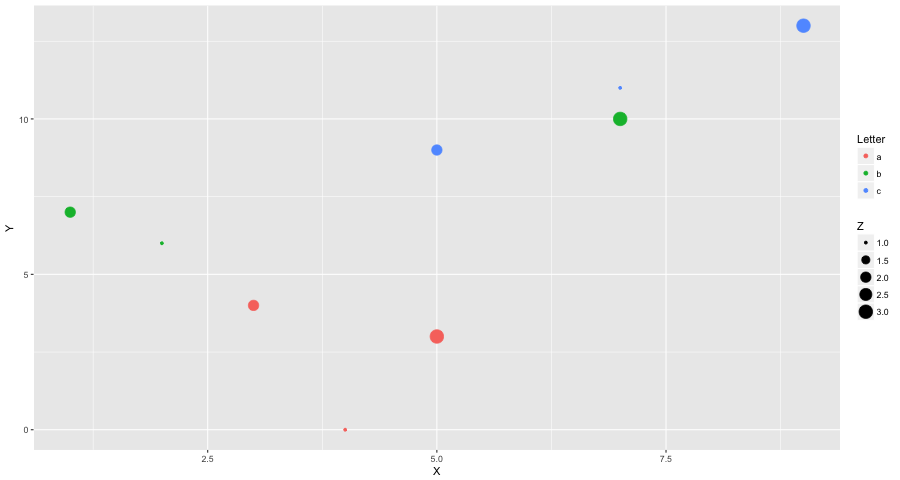

In [12]:
%%R -i df -w 900 -h 480 -u px

## Everything in here is ** R ** (magic)

print(df) # Tada, df is now an R dataframe

library("ggplot2") # If this line does not work, make sure you have R installed on your laptop

ggplot(data = df) + geom_point(aes(x = X, y = Y, color = Letter, size = Z))


---